In [1]:
# Pandas
import pandas as pd
# Import SQL Alchemy
from sqlalchemy import create_engine
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

##### Create a histogram to visualize the most common salary ranges for employees.
Create a bar chart of average salary by title.

In [15]:
# password was changed here according to Homework
engine = create_engine('postgresql://postgres:<password>@localhost:5432/EMPLOYEE_DB')
#engine = create_engine('postgresql://localhost:5432/EMPLOYEE_DB')
connection = engine.connect()
connection

In [4]:
conn = engine.connect()

In [5]:
 # Query All Records in the the Databasetitle
data_dept = pd.read_sql("select * from departments", conn)
data_employee = pd.read_sql("select * from EMPLOYEES ", conn)
data_sal = pd.read_sql("select * from SALARIES ", conn)
data_title = pd.read_sql("select * from TITLES ", conn)

In [7]:
data_title.head()


,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [6]:
data_sal = pd.read_sql("select * from SALARIES ", conn)
data_sal

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [7]:
employee_salary_pd = data_employee.merge(data_sal,  on="emp_no", how="inner")

In [8]:
emp_no_salary_pd = employee_salary_pd[["salary"]]

In [14]:
emp_no_salary_pd

,salary
0,40000
1,53422
2,48973
3,40000
4,40000
...,...
300019,69696
300020,75355
300021,61886
300022,62772


array([[<AxesSubplot:title={'center':'salary'}>]], dtype=object)

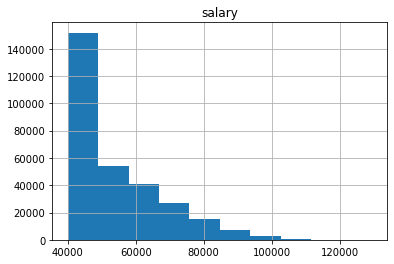

In [9]:
emp_no_salary_pd.hist(column='salary')

Create a bar chart of average salary by title.

select e.emp_no , e.first_name, e.last_name  , e.sex , s.salary, e.emp_title_ID, t.title  from EMPLOYEES e
join SALARIES s
on e.emp_no = s.emp_no 
join TITLES t
on  e.emp_title_ID =  t.title_ID

select  s.salary, t.title  from EMPLOYEES e
join SALARIES s
on e.emp_no = s.emp_no 
join TITLES t
on  e.emp_title_ID =  t.title_ID



In [10]:
title_query= '''
select  t.title , round(AVG(salary),2)as avg_salary from EMPLOYEES e
join SALARIES s
on e.emp_no = s.emp_no 
join TITLES t
on  e.emp_title_ID =  t.title_ID 
group by title 
'''
data_employee_salary_title = pd.read_sql_query(title_query,engine)
data_employee_salary_title.head(10)

,title,avg_salary
0,Assistant Engineer,48564.43
1,Engineer,48535.34
2,Manager,51531.04
3,Senior Engineer,48506.80
4,Senior Staff,58550.17
5,Staff,58465.38
6,Technique Leader,48582.90


In [18]:
data_employee_salary_title['title']

0    Assistant Engineer
1              Engineer
2               Manager
3       Senior Engineer
4          Senior Staff
5                 Staff
6      Technique Leader
Name: title, dtype: object

Text(0.5, 1.0, 'average salary by title')

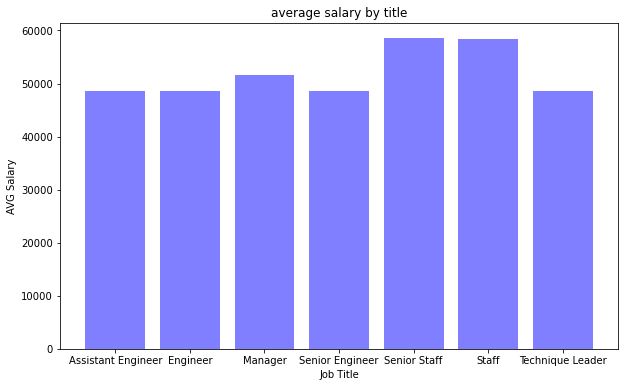

In [11]:
plt.figure(figsize=(10,6))
plt.bar(data_employee_salary_title['title'], data_employee_salary_title['avg_salary'] ,color='blue',alpha=0.5, align="center")
plt.xlabel('Job Title')
plt.ylabel('AVG Salary')
plt.title('average salary by title')

##### Evidence in hand, you march into your boss's office and present the visualization. With a sly grin, your boss thanks you for your work. On your way out of the office, you hear the words, "Search your ID number." You look down at your badge to see that your employee ID number is 499942.

In [12]:
data_employee.head(10)


,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
5,263976,e0003,1959-10-30,Eran,Cusworth,M,1986-11-14
6,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28
7,461591,s0002,1964-11-17,Xudong,Samarati,M,1985-11-13
8,477657,e0002,1962-12-18,Lihong,Magliocco,M,1993-10-23
9,219881,s0002,1956-04-24,Kwangyoen,Speek,F,1993-02-14


In [13]:
data_employee.query('emp_no=="499942"')

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
168736,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
